In [56]:
import os
import shutil
import numpy as np
import xarray as xr
from mpas_tools.io import write_netcdf
import argparse
import math
import time
import bisect
import matplotlib.pyplot as plt

In [121]:
ytau = np.zeros(7)
taud = np.zeros(7)
ytau[:] = np.array([-70.,-45.,-15.,0.,15.,45.,70.])*np.pi/180.
taud[:] = np.array([0,.2,-0.1,-.02,-.1,.1,0])

In [92]:
latCell = 75.*np.pi/180.

In [93]:
bisect.bisect_right(ytau,latCell)

7

In [94]:
bisect.bisect_left(ytau,latCell)

7

In [15]:
latCell = np.arange(-69.5, 70, 1)*np.pi/180.

In [122]:
latCell = np.arange(-75, 75, 1)*np.pi/180.

In [123]:
len(latCell)

150

In [124]:
bb = np.zeros(len(latCell))
kk = np.zeros(len(latCell))
windStressZonal = np.zeros(len(latCell))

In [129]:
for iCell in np.arange(len(latCell)):
    #bb[iCell]=bisect.bisect_right(ytau,latCell[iCell])
    #print(iCell,latCell[iCell]*180/np.pi)
    #print(iCell,  max(0, np.int(bb[iCell]) - 1))
    #kk[iCell] = min(max(0, (np.int(bb[iCell]) - 1)), len(ytau)-2)
    ks= min(max(0, bisect.bisect_right(ytau,latCell[iCell]) - 1), len(ytau)-2)
    windStressZonal[iCell] = taud[ks] + ( taud[ks+1] - taud[ks]) * scurve(latCell[iCell], ytau[ks], ytau[ks+1]-ytau[ks])
    #print(iCell,latCell[iCell]*180/np.pi, bb[iCell],  kk[iCell], windStressZonal[iCell])

In [33]:
def scurve(x, x0, dx):
    """Returns 0 for x<x0 or x>x+dx, and a cubic in between."""
    s = np.minimum(1, np.maximum(0, (x-x0)/dx))
    return (3 - 2*s)*( s*s )

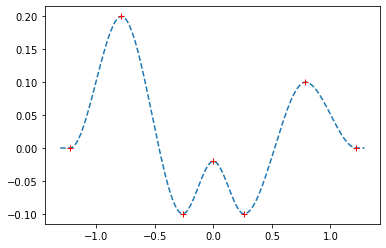

In [130]:
plt.plot(latCell, windStressZonal, '--')
plt.plot(ytau, taud, '+r')

In [ ]:
Ref from wind_profile (neverWorld2)

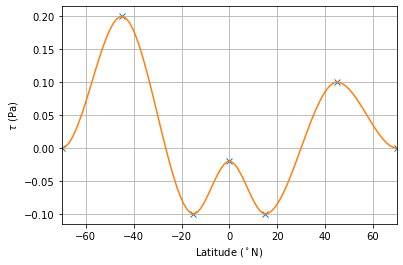

In [87]:
def itau(ytau,taud,ys):
    """Returns a profile tau(ys) that uses s-curves between node,valuesa ytau,taud"""
    taus = 0.*ys
    ks = 0
    for i in range(len(ys)):
        y = ys[i]
        if y>=ytau[ks+1]:
            ks=min(len(ytau)-2,ks+1)
        taus[i] = taud[ks] + ( taud[ks+1] - taud[ks]) * scurve(y, ytau[ks], ytau[ks+1]-ytau[ks])
    return taus
ytau,taud = [-70,-45,-15,0,15,45,70], [0,.2,-0.1,-.02,-.1,.1,0]
ys = np.linspace(-70,70,100)
tau = itau(ytau, taud, ys)
plt.plot(ytau,taud,'x')
plt.plot(ys, tau)
plt.xlim(-70,70);
plt.xlabel('Latitude ($^\circ$N)');
plt.ylabel(r'$\tau$ (Pa)');
plt.grid();